In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('../data/final_master.csv')

In [5]:
df.shape

(26714, 11)

In [6]:
df.head()

,round1winnervotes,round2winnervotes,round3winnervotes,round4winnervotes,round5winnervotes,round6winnervotes,round7winnervotes,total_votes_allrounds,num_candidates,noise,spoiled
0,11346,13632,0,0,0,0.0,0.0,24978,3.0,0.020000,1
1,11220,0,0,0,0,0.0,0.0,11220,3.0,0.030000,1
2,6243,10050,0,0,0,0.0,0.0,16293,3.0,0.046667,0
3,5246,5974,6964,8368,10437,13888.0,20829.0,71706,8.0,0.005000,1
4,17535,24995,0,0,0,0.0,0.0,42530,3.0,0.033333,1


In [7]:
df[df.isna().any(axis=1)]

,round1winnervotes,round2winnervotes,round3winnervotes,round4winnervotes,round5winnervotes,round6winnervotes,round7winnervotes,total_votes_allrounds,num_candidates,noise,spoiled
7398,4843,5772,7406,9746,14340,0.0,NaN,42107,6.0,0.021667,1
7399,5805,6292,0,0,0,0.0,NaN,12097,3.0,0.036667,1
7400,6686,10493,0,0,0,0.0,NaN,17179,3.0,0.000000,1
7401,8063,11588,15108,0,0,0.0,NaN,34759,4.0,0.020000,1
7402,3168,3756,4592,6095,9285,0.0,NaN,26896,6.0,0.018333,1
...,...,...,...,...,...,...,...,...,...,...,...
26709,8603,12067,0,0,0,0.0,NaN,20670,3.0,0.016667,1
26710,2962,3429,4105,5114,6856,10260.0,NaN,32726,7.0,0.008571,1
26711,18078,26186,0,0,0,0.0,NaN,44264,3.0,0.043333,1
26712,2776,3592,4688,6703,0,0.0,NaN,17759,5.0,0.016000,0


In [8]:
# Replacing NaNs w/0s:

import numpy as np

df = df.replace(np.nan, 0)

---

### Making independent vars/dependent var

In [9]:
X = df.iloc[:, :-1].values

In [10]:
y = df['spoiled'].values

## ~LogReg~

In [8]:
# from sklearn.linear_model import LogisticRegression

In [71]:
# clf = LogisticRegression(random_state=0).fit(X, y)

In [1]:
# clf

In [2]:
# clf.score(X, y)  # score = mean accuracy

## Prepping the data for modeling

In [27]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

from sklearn.ensemble import RandomForestClassifier

### With SMOTE

[Article](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

[Random Forest models should *not* have imbalanced classes](https://stats.stackexchange.com/questions/242833/is-random-forest-a-good-option-for-unbalanced-data-classification#:~:text=2%20Answers&text=It's%20not%20a%20good%20option,the%20data%20(with%20replacement).)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)


(21371, 10)
(21371,)
(5343, 10)
(5343,)


In [22]:
from collections import Counter

In [28]:
Counter(train_y)

Counter({0: 2939, 1: 18432})

In [17]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

import imblearn

In [29]:
oversample = imblearn.over_sampling.SMOTE()

In [32]:
smote_train_X, smote_train_y = oversample.fit_resample(train_X, train_y)

In [33]:
Counter(smote_train_y)

Counter({0: 18432, 1: 18432})

### With stratified k-fold cross-validation

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    
from sklearn.model_selection import StratifiedKFold

In [45]:
skf = StratifiedKFold()

In [46]:
skf.get_n_splits(X, y)

5

In [47]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    skf_X_train, skf_X_test = X[train_index], X[test_index]
    skf_y_train, skf_y_test = y[train_index], y[test_index]
    
# how does this show me an equal distribution of classes in each split?

TRAIN: [ 5302  5303  5304 ... 26711 26712 26713] TEST: [   0    1    2 ... 5595 5601 5605]
TRAIN: [    0     1     2 ... 26711 26712 26713] TEST: [ 5302  5303  5304 ... 10946 10974 10976]
TRAIN: [    0     1     2 ... 26711 26712 26713] TEST: [10641 10642 10643 ... 16032 16033 16034]
TRAIN: [    0     1     2 ... 26711 26712 26713] TEST: [15963 15980 15983 ... 21411 21412 21429]
TRAIN: [    0     1     2 ... 21411 21412 21429] TEST: [21366 21367 21368 ... 26711 26712 26713]


In [44]:
print(skf_X_test.shape)
print(skf_X_train.shape)
print(skf_y_test.shape)
print(skf_y_train.shape)

(5342, 10)
(21372, 10)
(5342,)
(21372,)


## Modeling: Random Forest

### Random forest w/SMOTE train data + regular test data

In [52]:
from sklearn.ensemble import RandomForestClassifier as rf

rf_smote = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [54]:
rf_smote.fit(smote_train_X, smote_train_y)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [56]:
# Use the forest's predict method on the test data
predictions = rf_smote.predict(test_X)

# Calculate the absolute errors
errors = abs(predictions - test_y)

In [57]:
errors.mean()

0.22627737226277372

In [58]:
fi = pd.DataFrame({'feature': list(df.iloc[:, :-1].columns),
                   'importance': rf_smote.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [59]:
fi

,feature,importance
9,noise,0.250010
1,round2winnervotes,0.229952
0,round1winnervotes,0.193802
7,total_votes_allrounds,0.173101
2,round3winnervotes,0.091137
3,round4winnervotes,0.032416
8,num_candidates,0.014839
4,round5winnervotes,0.010148
5,round6winnervotes,0.003654
6,round7winnervotes,0.000940


In [60]:
rf_smote.score(test_X, test_y)  # mean accuracy

0.7737226277372263

In [61]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, predictions)
print(conf_mat)

[[ 202  574]
 [ 635 3932]]


[[0.26030928 0.73969072]
 [0.13904095 0.86095905]]


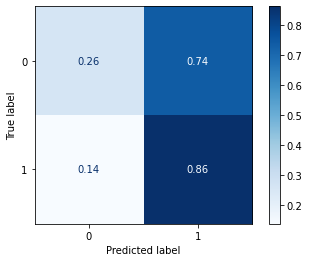

In [63]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 

conf_mat = confusion_matrix(test_y, predictions, normalize='true')
print(conf_mat)


disp = plot_confusion_matrix(rf_smote, test_X, test_y, cmap=plt.cm.Blues, normalize='true')


### Random forest w/stratified kfold cross-validation train/test data

In [64]:
rf_skf = RandomForestClassifier(n_estimators = 1000, random_state = 43)

In [65]:
rf_skf.fit(skf_X_train, skf_y_train)

RandomForestClassifier(n_estimators=1000, random_state=43)

In [69]:
# Use the forest's predict method on the test data
predictions = rf_skf.predict(skf_X_test)


# Calculate the absolute errors
errors = abs(predictions - skf_y_test)

In [70]:
errors.mean()  # shittier mean error than w/SMOTE

0.1538749532010483

In [71]:
fi = pd.DataFrame({'feature': list(df.iloc[:, :-1].columns),
                   'importance': rf_skf.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [72]:
fi

,feature,importance
1,round2winnervotes,0.247290
0,round1winnervotes,0.242164
7,total_votes_allrounds,0.228934
2,round3winnervotes,0.113654
9,noise,0.092076
3,round4winnervotes,0.046600
4,round5winnervotes,0.014337
8,num_candidates,0.007893
5,round6winnervotes,0.005586
6,round7winnervotes,0.001466


In [73]:
rf_skf.score(skf_X_test, skf_y_test)  # but better accuracy than SMOTE....

0.8461250467989517

In [74]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(skf_y_test, predictions)
print(conf_mat)

[[  51  692]
 [ 130 4469]]


[[0.06864065 0.93135935]
 [0.02826701 0.97173299]]


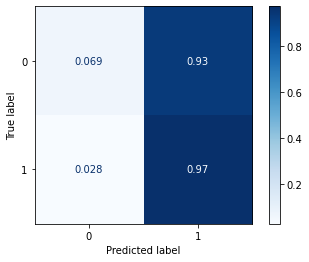

In [75]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 

conf_mat = confusion_matrix(skf_y_test, predictions, normalize='true')
print(conf_mat)


disp = plot_confusion_matrix(rf_skf, skf_X_test, skf_y_test, cmap=plt.cm.Blues, normalize='true')


# uh oh, that's real crappy performance

### Random forest w/regular data

In [76]:
rf_regular = RandomForestClassifier(n_estimators = 1000, random_state = 44)

In [78]:
rf_regular.fit(train_X, train_y)

RandomForestClassifier(n_estimators=1000, random_state=44)

In [79]:
# Use the forest's predict method on the test data
predictions = rf_regular.predict(test_X)


# Calculate the absolute errors
errors = abs(predictions - test_y)

In [80]:
errors.mean()  # very slightly better than w/kfold xvalidation

0.15571776155717762

In [81]:
fi = pd.DataFrame({'feature': list(df.iloc[:, :-1].columns),
                   'importance': rf_regular.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [82]:
fi

,feature,importance
1,round2winnervotes,0.247417
0,round1winnervotes,0.242909
7,total_votes_allrounds,0.228156
2,round3winnervotes,0.113642
9,noise,0.090503
3,round4winnervotes,0.046617
4,round5winnervotes,0.014937
8,num_candidates,0.008496
5,round6winnervotes,0.005544
6,round7winnervotes,0.001779


In [83]:
rf_regular.score(test_X, test_y)  # slightly shittier accuracy than kfold xvalidation

0.8442822384428224

In [84]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, predictions)
print(conf_mat)

[[  49  727]
 [ 105 4462]]


[[0.06314433 0.93685567]
 [0.02299102 0.97700898]]


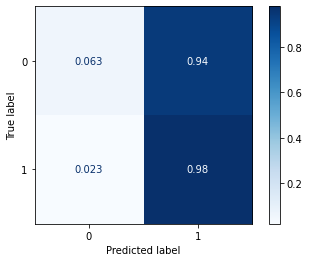

In [85]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 

conf_mat = confusion_matrix(test_y, predictions, normalize='true')
print(conf_mat)


disp = plot_confusion_matrix(rf_regular, test_X, test_y, cmap=plt.cm.Blues, normalize='true')


# uh oh, that's real crappy performance

### Hyperparameter pipeline

In [ ]:
# use sherin's vfi thing